In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import relevant files

path = r'C:\Users\Lapis Lazuli\Documents\Python Projects\CareerFoundry'

In [3]:
df = pd.read_pickle(os.path.join(path, '2 Data','Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
# Check that data was important correctly

df.shape

(30629741, 30)

In [5]:
df.head(10)

,user_id,first_name,last_name,gender,state,age,date_joined,#_of_dependants,marital_status,income,...,days_since_prior_order,add_to_cart_order,reordered,_merge,max_order,loyalty_flag,avg_price,spending_flag,frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,2,0,both,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,11.0,1,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,10.0,2,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,NaN,1,0,both,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,2,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,19.0,2,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,1,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,21.0,1,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,11.0,2,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,10.0,3,1,both,8,New customer,7.988889,Low spender,19.0,Regular customer


In [23]:
# Check names of columns

for col in df.columns:
    print(col)

user_id
first_name
last_name
gender
state
age
date_joined
#_of_dependants
marital_status
income
product_id
product_name
aisle_id
department_id
prices
order_id
eval_set
order_number
orders_day_of_week
order_hour_of_day
days_since_prior_order
add_to_cart_order
reordered
_merge
max_order
loyalty_flag
avg_price
spending_flag
frequency
frequency_flag


### Create a bar graph representing the order day of week

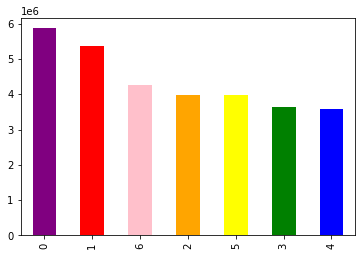

In [24]:
bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [32]:
# Export the bar chart

bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Create a histogram representing the frequency of the prices of items

<AxesSubplot:ylabel='Frequency'>

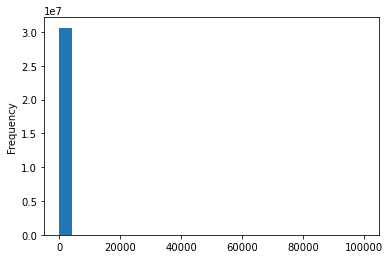

In [26]:
df['prices'].plot.hist(bins = 25)

In [27]:
# The histogram doesn't look right so we conduct a statistical analysis to further investigate

df['prices'].describe()

count    3.062974e+07
mean     1.191679e+01
std      4.913739e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#### Further investigation finds that the max value seems to be odd, as there are values above 99,999 which is pretty unrealistic for a grocery store. Assuming the highest price for an item is 100, removing any value above that will make the data more readable in a histogram

In [29]:
# Remove any outlier values that within the 'prices' column that are greater than 100

df.loc[df['prices']>100, 'prices'] = np.nan

In [30]:
df['prices'].max()

25.0

#### Now we can create a histogram with a more fair representation of the prices of objects

<AxesSubplot:ylabel='Frequency'>

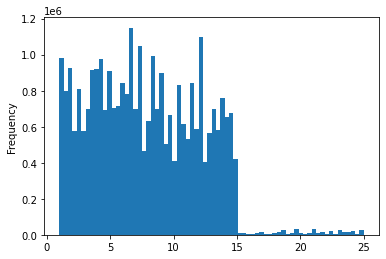

In [33]:
hist = df['prices'].plot.hist(bins = 70)
hist

In [34]:
# Export the visualization

hist.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','hist_prices.png'))

### Create a line chart showing price changes within the day of the week

In [18]:
# Create a subset of the dataset first representing 30% of the sample (as not to overwhelm the CPU due to the large dataset)

dev = np.random.rand(len(df)) <= 0.7

In [19]:
big = df[dev]

In [20]:
small = df[~dev]

In [38]:
# Check that the dataset matches the addition of each portion of the dataset

len(df)

30629741

In [39]:
len(big) + len(small)

30629741

In [40]:
# Assign the smaller subset of the dataset to create the line graph

df_2 = small[['orders_day_of_week','prices']]

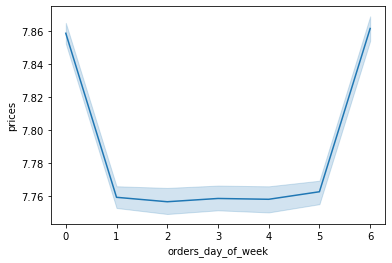

In [41]:
# Create the line graph with the new subset

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [42]:
# Export the graph

line.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','line_dow.png'))

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

Text(0.5, 0, 'Hour of Day')

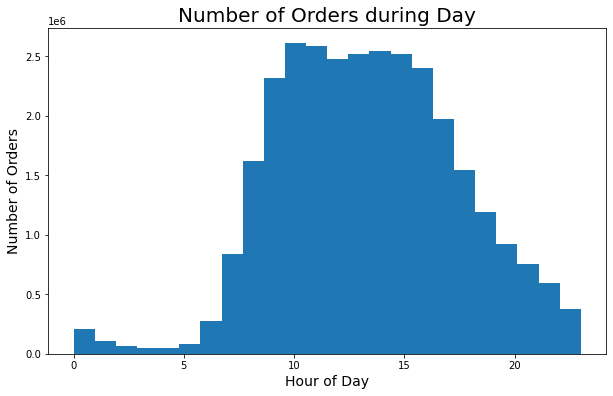

In [10]:
hist1 = df['order_hour_of_day'].plot.hist(bins=24,figsize=(10,6))
plt.title('Number of Orders during Day',fontsize=20)
plt.ylabel('Number of Orders',fontsize=14)
plt.xlabel('Hour of Day',fontsize=14)

In [12]:
hist1.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','hist_hour_of_day.png'))

#### The most popular hours that instacart is used starts from 9AM - about 5PM, then starts to dwindle down for the night. This graph makes sense because grocery stores don't open until about 6AM anyway (other than some 24/7 stores) and most people won't really need to do their groceries until a few hours after they open

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

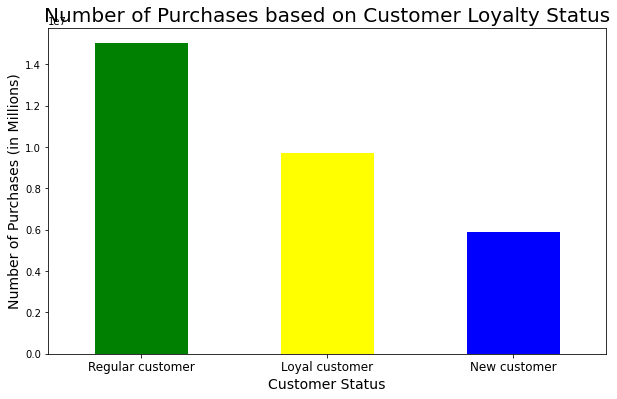

In [15]:
bar1 = df['loyalty_flag'].value_counts().plot.bar(figsize=(10,6), color=['green','yellow','blue'])
plt.title('Number of Purchases based on Customer Loyalty Status',fontsize=20)
plt.ylabel('Number of Purchases (in Millions)',fontsize=14)
plt.xlabel('Customer Status',fontsize=14)
plt.xticks(rotation=0,fontsize=12)

In [16]:
bar1.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','bar_loyalty.png'))

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [21]:
df_3 = small[['order_hour_of_day','prices']]

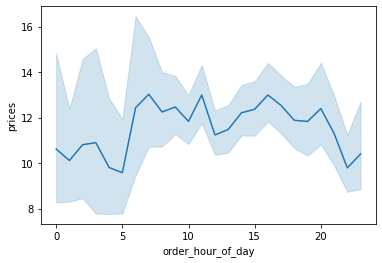

In [22]:
line1 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [23]:
line1.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','line_hour_of_day_prices.png'))

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [24]:
df_4 = small[['age','#_of_dependants']]

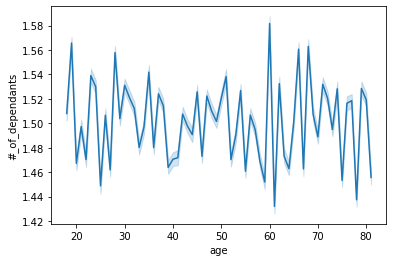

In [25]:
line2 = sns.lineplot(data = df_4, x = 'age', y = '#_of_dependants')

In [26]:
line2.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','line_dependents_age.png'))

#### There doesn't seem to be any direct correlations between age and number of dependents. There are some outliers like the age 60 where there seems to be the highest amount of dependents, but also after 60 seems to have the lowest for some reason

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function

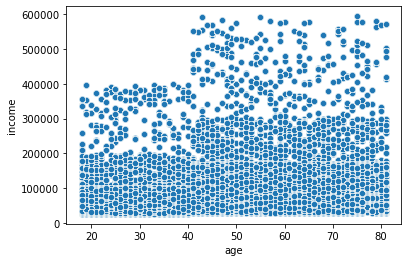

In [29]:
scatterplot1 = sns.scatterplot(x = 'age',y='income',data = df)

In [ ]:
scatterplot1.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','scatterplot_age_income.png'))

#### There is a positive correlation between income and age, as there are people with higher incomes within the older populations